# Nuages de mots

## Imports et stopwords

In [7]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [26]:
# Choisir une année
year = 1889

In [27]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [28]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [29]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [30]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"-. %- '-î ; î ■ . ■fÉmatat—aaà»iMMteSi . qui est à César. On le voit, lé rôle du' président d’assaut ést extrêmement délioat, aussi ne compte» S qù .pas à la douzaine los amateurs capa- Lee ue remplir"

In [31]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [32]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"-. %- '-î ; î ■ . ■fÉmatat—aaà»iMMteSi . qui est à César. On le voit, lé rôle du' président d’assaut ést extrêmement délioat, aussi ne compte» S qù .pas à la douzaine los amateurs capa- Lee ue remplir cette fonction. rT -:'; , ATH03 V î L’autre jour, à Paris, à l'Académie des sciences, le vénérable M. Glievreul a présenté au nom de son chef do laboratoire, M. Arnaud, un travail sur le poison avec lequel les noire du ■ pays dos Somalis et d’une partie de la côto orientale do l’Afrique enduisent l"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [33]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [34]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1889_clean.txt!'

In [35]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'FÉMATAT AAÀ IMMTESI CÉSAR VOIT RÔLE PRÉSIDENT ASSAUT ÉST EXTRÊMEMENT DÉLIOAT COMPTE DOUZAINE LOS AMATEURS CAPA LEE REMPLIR FONCTION JOUR PARIS ACADÉMIE SCIENCES VÉNÉRABLE GLIEVREUL PRÉSENTÉ NOM CHEF LABORATOIRE ARNAUD TRAVAIL POISON LEQUEL NOIRE PAYS DOS SOMALIS PARTIE CÔTO ORIENTALE AFRIQUE ENDUISENT POINTE LEURS IANCÇS LEURS FLÈCHES POISON TEL EMPLOYÉ SOMALIS PRÉSENTE FORME SUBSTANCE BRUNE PETITE PARCELLE CETTO SUBSTANCE LOGÉE CAVITÉ PLACÉE POINTE FLÈCHE LANCE LORS TOUTE PIQÛRE FAITE CETTO ARM'

## Nuage de mots

### Afficher les termes les plus fréquents


In [22]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 2772), ('MAISON', 1048), ('LOUER', 989), ('PLACE', 952), ('BRUXELLES', 813), ('DÉS', 764), ('ANS', 753), ('FILLE', 626), ('PRIX', 587), ('BON', 564)]


### Créer, stocker et afficher le nuage de mots

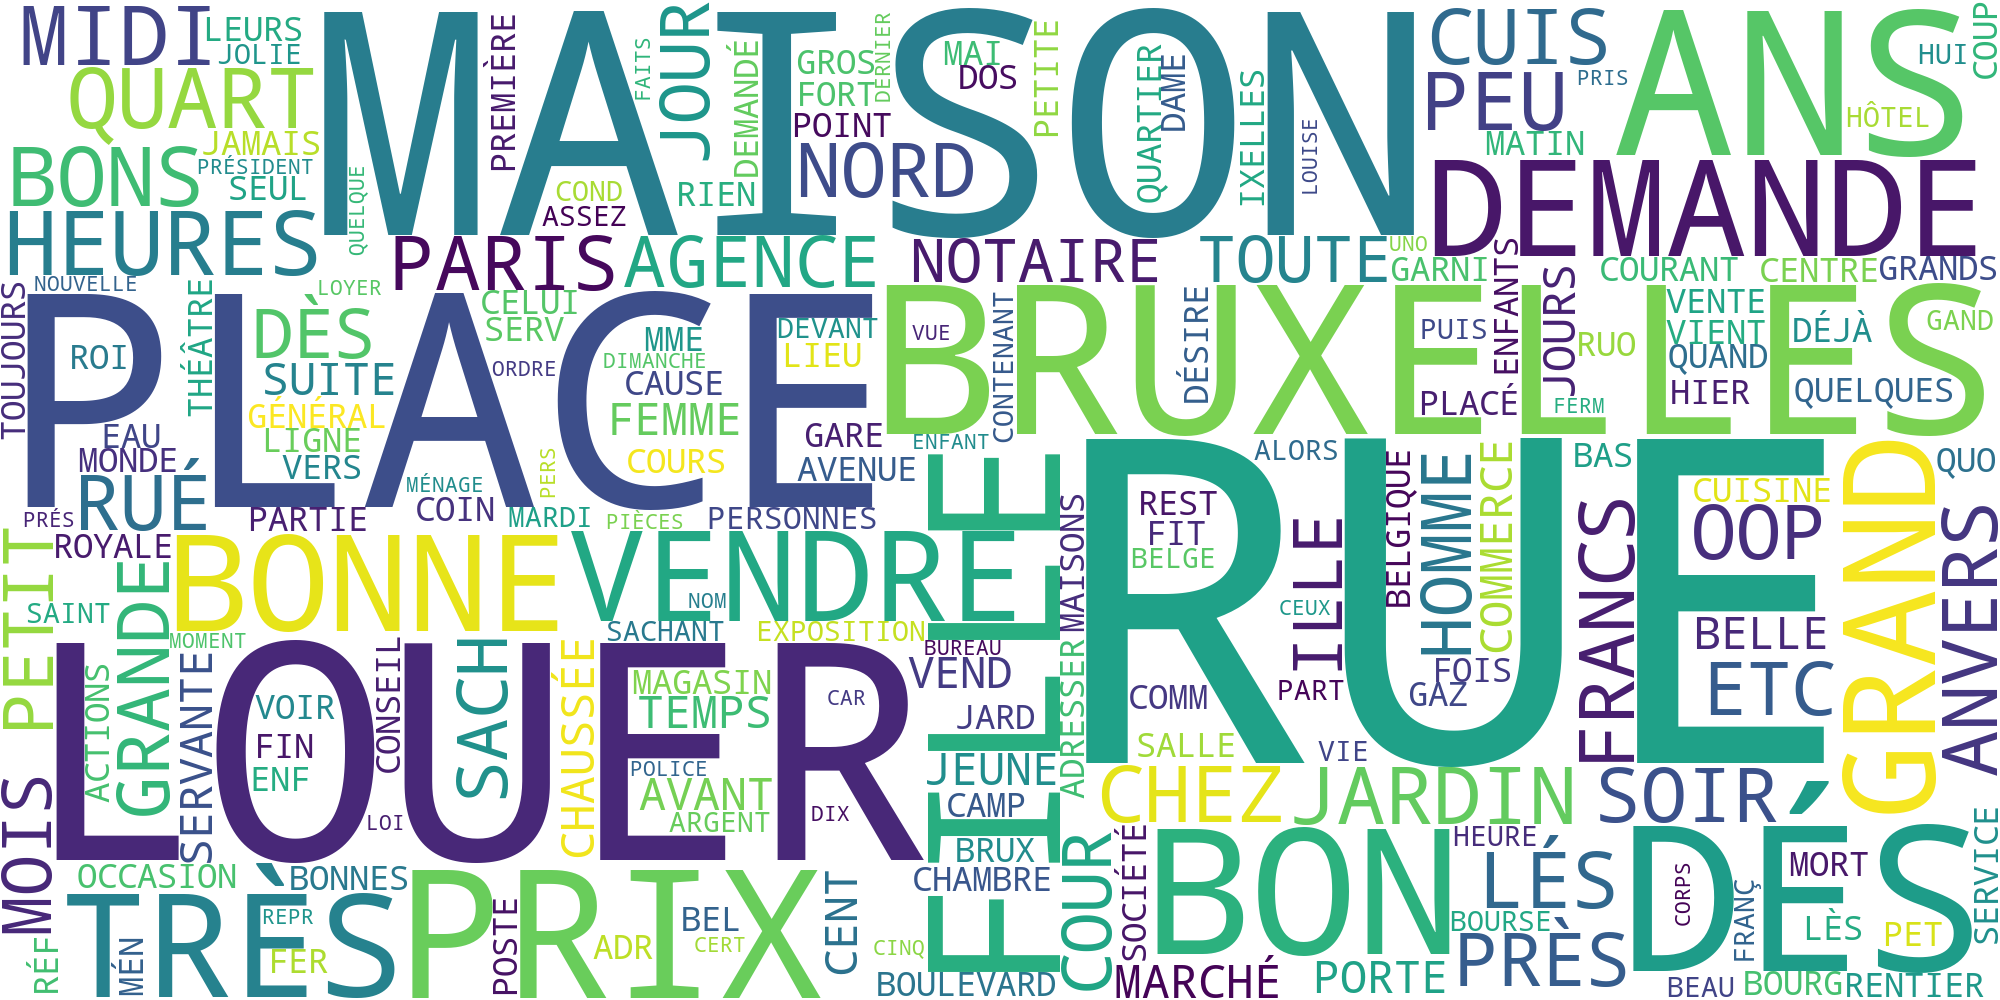

In [23]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))